# Predicting best diabetes ( Solo insulin or Drug + Insulin treatment)
The study looks to analyze the database of diabetic patients from a medical database. The dataset contains mostly patient details as well as their medical records. The goal of the study is to determine if a diabetic patient will require solo-insulin treatment or insulin + drug therapy. The success of the treatment will be based on the target variable ( IF THE PATIENT IS READMITTED TO THE HOSPITAL)

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
%matplotlib inline
pd.pandas.set_option('display.max_columns',None)

In [7]:
df = pd.read_csv('diabetic_data.csv')
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [8]:
df.info()
# 37 character type data and 13 numerical type data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            10176

# Categorical Variable EDA

In [9]:
# Separate all categorical variable
cat_feature = [feature for feature in df.columns if df[feature].dtype == 'O']

print('The dataset has {} categorical variables'.format(len(cat_feature)))

The dataset has 37 categorical variables


In [10]:
# Determine features with missing variables
names =[]
for feature in cat_feature:
    if '?' in df[feature].unique() or 'None' in df[feature].unique():
        names.append(feature)
    else:
        names = names

In [11]:
# Count percentage of missing data
for feature in names:
    data = df.copy()
    if '?' in data[feature].unique():
        data[feature] = np.where(data[feature] == '?',1,0)
        print('{} has {} % missing variable'.format(feature,(data[feature].value_counts(1)*100)[1]))
    else:
        data[feature] = np.where(data[feature] == 'None',1,0)
        print('{} has {} % missing variable'.format(feature,(data[feature].value_counts(1)*100)[1]))

race has 2.2335554114340743 % missing variable
weight has 96.85847925633315 % missing variable
payer_code has 39.5574160328597 % missing variable
medical_specialty has 49.08220820313268 % missing variable
diag_1 has 0.02063557573256294 % missing variable
diag_2 has 0.3517874339170253 % missing variable
diag_3 has 1.398305917497003 % missing variable
max_glu_serum has 94.74677200636755 % missing variable
A1Cresult has 83.27732248491637 % missing variable


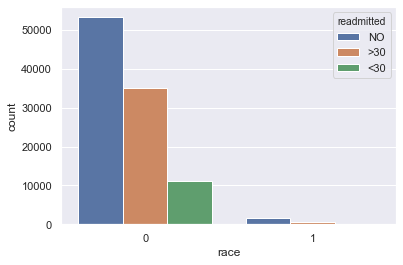

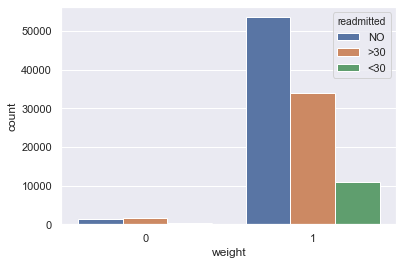

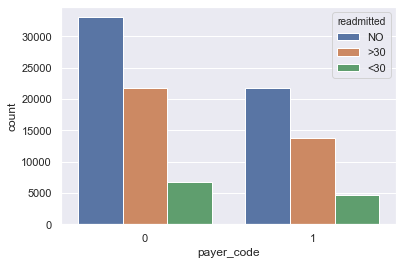

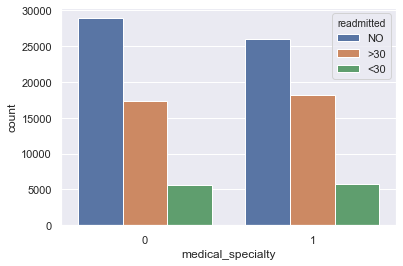

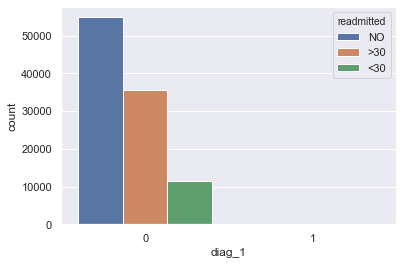

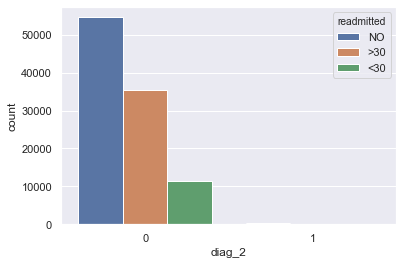

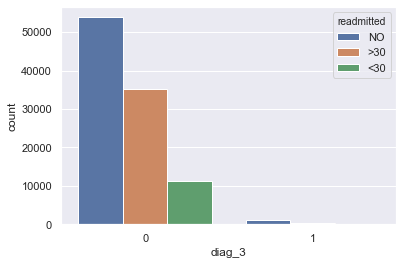

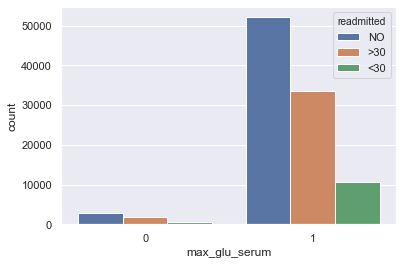

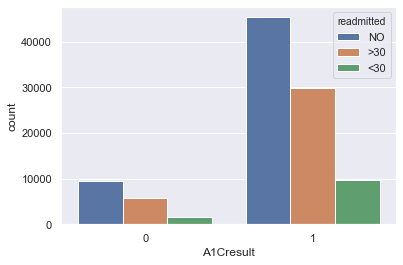

In [12]:
# Check the significance of missing value to predicted outcome
for feature in names:
    data = df.copy()
    if '?' in data[feature].unique():
        data[feature] = np.where(data[feature] == '?',1,0)
        sns.countplot(data=data,x=feature,hue='readmitted')
        plt.xlabel(feature)
        plt.show()
    else:
        data[feature] = np.where(data[feature] == 'None',1,0)
        sns.countplot(data=data,x=feature,hue='readmitted')
        plt.xlabel(feature)
        plt.show()

# Numerical feature EDA

In [13]:
# Extract all numerical data
num_feature = [feature for feature in df.columns if df[feature].dtypes !='O']
print('Dataset has {} numerical variables'.format(len(num_feature)))

Dataset has 13 numerical variables


In [14]:
# Determine features with missing variables
for feature in num_feature:
    if df[feature].isnull().sum() >1:
        print(feature)

In [15]:
# Check the number of unique labels for each numerical variable
for feature in num_feature:
    print('{} has {} unique labels'.format(feature,df[feature].nunique()))

encounter_id has 101766 unique labels
patient_nbr has 71518 unique labels
admission_type_id has 8 unique labels
discharge_disposition_id has 26 unique labels
admission_source_id has 17 unique labels
time_in_hospital has 14 unique labels
num_lab_procedures has 118 unique labels
num_procedures has 7 unique labels
num_medications has 75 unique labels
number_outpatient has 39 unique labels
number_emergency has 33 unique labels
number_inpatient has 21 unique labels
number_diagnoses has 16 unique labels


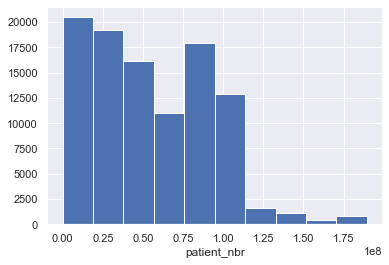

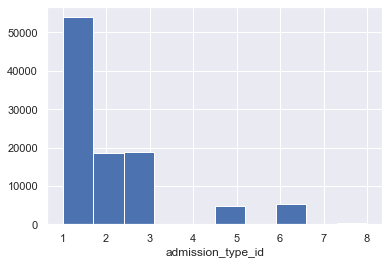

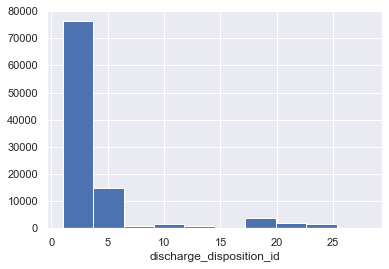

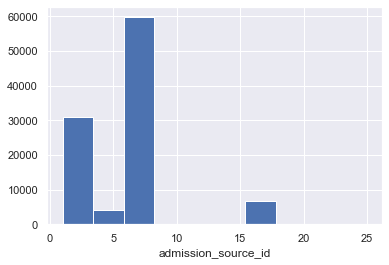

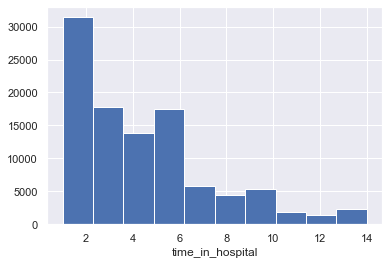

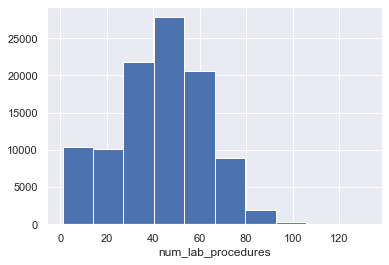

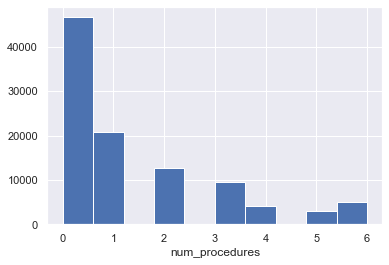

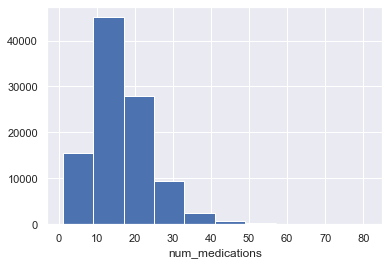

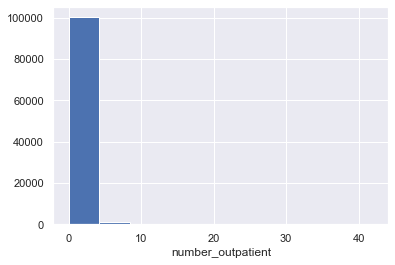

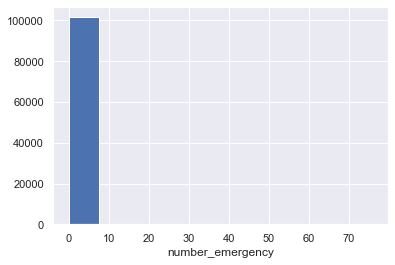

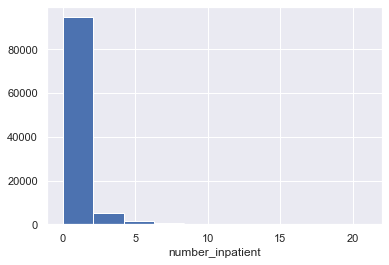

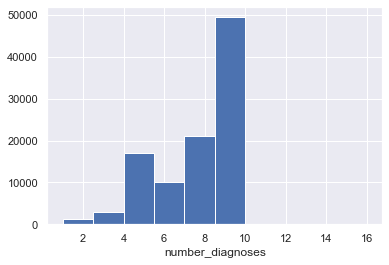

In [16]:
# Plot a histogram for all numerical variable 
for feature in num_feature:
    data = df.copy()
    if feature != 'encounter_id':
        plt.hist(x=feature,data=data,bins=10)
        plt.xlabel(feature)
        plt.show()

# Categorical Variable Pre-processing

# Race

In [17]:
df_race = df.copy()

In [18]:
df_race['race'].value_counts(1)*100
# Bundle the ?, Hispanic ,Other, and Asian,race together

Caucasian          74.778413
AfricanAmerican    18.876639
?                   2.233555
Hispanic            2.001651
Other               1.479866
Asian               0.629876
Name: race, dtype: float64

In [19]:
df_race['race'] = df_race['race'].where(df_race['race'].isin(['Caucasian','AfricanAmerican']),'Other')

In [20]:
df_race['race'].value_counts(1)*100

Caucasian          74.778413
AfricanAmerican    18.876639
Other               6.344948
Name: race, dtype: float64

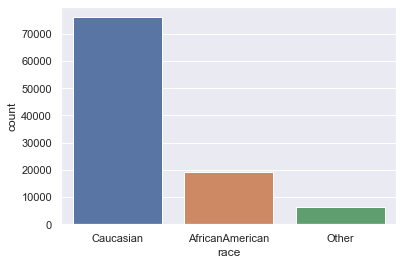

In [21]:
sns.countplot(data = df_race,x='race')

# Gender

In [22]:
df_gender = df_race.copy()

In [23]:
df_gender['gender'].value_counts()

Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64

In [24]:
# Remove the missing data
df_gender.drop(df_gender.index[df_gender['gender'] == 'Unknown/Invalid'], inplace = True)

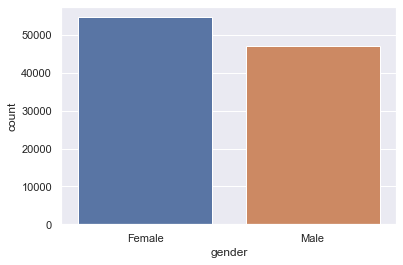

In [25]:
sns.countplot(data = df_gender,x='gender')

# Weight , payer code and medical speciality

In [26]:
# Drop all the three features due to too many missing values
df_gender.drop(['weight','payer_code','medical_specialty'],inplace=True,axis=1)

# Diag_1 , Diag_2 , Diag_3

In [27]:
# Drop all the missing data first followed by grouping the diagnosis codes
df_diag = df_gender.copy()

In [28]:
df_diag.drop(df_diag.index[df_diag['diag_1'] == '?'], inplace = True)
df_diag.drop(df_diag.index[df_diag['diag_2'] == '?'], inplace = True)
df_diag.drop(df_diag.index[df_diag['diag_3'] == '?'], inplace = True)

In [29]:
# Each health codes are grouped in a range of numbers to represent the various dieseas for a given health issue
######################################################################################
#Diseases and Injuries Tabular Index
#1. INFECTIOUS AND PARASITIC DISEASES (001-139)
#2. NEOPLASMS (140-239)
#3. ENDOCRINE, NUTRITIONAL AND METABOLIC DISEASES, AND IMMUNITY DISORDERS (240-279)
#4. DISEASES OF THE BLOOD AND BLOOD-FORMING ORGANS (280-289)
#5. MENTAL DISORDERS (290-319)
#6. DISEASES OF THE NERVOUS SYSTEM AND SENSE ORGANS (320-389)
#7. DISEASES OF THE CIRCULATORY SYSTEM (390-459)
#8. DISEASES OF THE RESPIRATORY SYSTEM (460-519)
#9. DISEASES OF THE DIGESTIVE SYSTEM (520-579)
#10. DISEASES OF THE GENITOURINARY SYSTEM (580-629)
#11. COMPLICATIONS OF PREGNANCY, CHILDBIRTH, AND THE PUERPERIUM (630-679)
#12. DISEASES OF THE SKIN AND SUBCUTANEOUS TISSUE (680-709)
#13. DISEASES OF THE MUSCULOSKELETAL SYSTEM AND CONNECTIVE TISSUE (710-739)
#14. CONGENITAL ANOMALIES (740-759)
#15. CERTAIN CONDITIONS ORIGINATING IN THE PERINATAL PERIOD (760-779)
#16. SYMPTOMS, SIGNS, AND ILL-DEFINED CONDITIONS (780-799)
#17. INJURY AND POISONING (800-999)
#SUPPLEMENTARY CLASSIFICATION OF FACTORS INFLUENCING HEALTH STATUS AND CONTACT WITH HEALTH SERVICES (V01-V89)
#SUPPLEMENTARY CLASSIFICATION OF EXTERNAL CAUSES OF INJURY AND POISONING (E800-E999)

group1 = range(1,140)
group2 = range(140,240)
group3 = range(240,280)
group4 = range(280,290)
group5 = range(290,320)
group6 = range(320,390)
group7 = range(390,460)
group8 = range(460,520)
group9 = range(520,580)
group10 = range(580,630)
group11 = range(630,680)
group12 = range(680,710)
group13 = range(710,740)
group14 = range(740,760)
group15 = range(760,780)
group16 = range(780,800)
group17 = range(800,1000)



In [30]:
def diag_group(x):
    if x[0] =='V':
        return 'group18'
    elif x[0] =='E':
        return 'group19'
    else:
        if round(int(float(x))) in group1:
            return 'group1'
        elif int(float(x)) in group2:
            return 'group2'
        elif int(float(x)) in group3:
            return 'group3'
        elif int(float(x)) in group4:
            return 'group4'
        elif int(float(x)) in group5:
            return 'group5'
        elif int(float(x)) in group6:
            return 'group6'
        elif int(float(x)) in group7:
            return 'group7'
        elif int(float(x)) in group8:
            return'group8'
        elif int(float(x)) in group9:
            return 'group9'
        elif int(float(x)) in group10:
            return'group10'
        elif int(float(x)) in group11:
            return 'group11'
        elif int(float(x)) in group12:
            return 'group12'
        elif int(float(x)) in group13:
            return 'group13'
        elif int(float(x)) in group14:
            return 'group14'
        elif int(float(x)) in group15:
            return 'group15'
        elif int(float(x)) in group16:
            return'group16'
        elif int(float(x)) in group17:
            return 'group17'
        else:
            return 'group18'


In [31]:
df_diag['diag_1'] = df_diag['diag_1'].apply(diag_group)
df_diag['diag_2'] = df_diag['diag_2'].apply(diag_group)
df_diag['diag_3'] = df_diag['diag_3'].apply(diag_group)

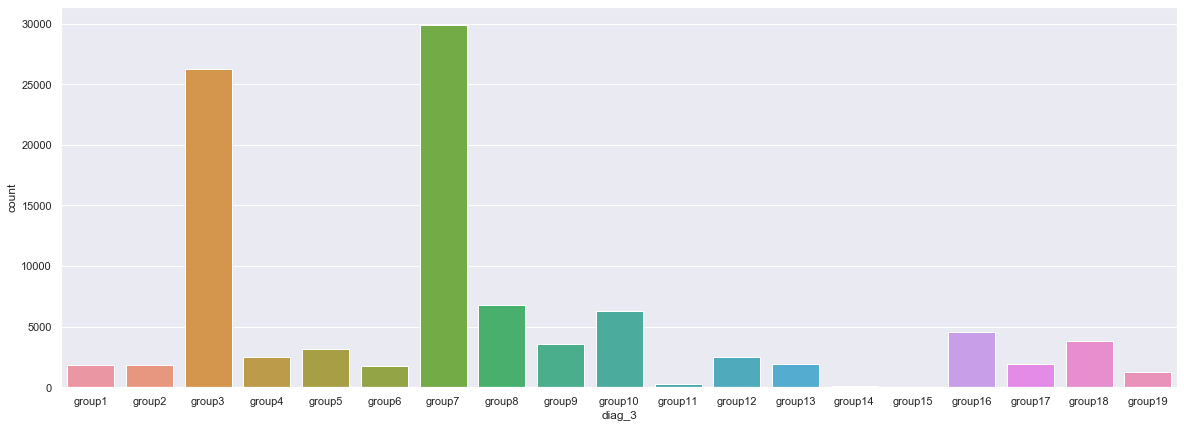

In [32]:
order_list = ['group1','group2','group3','group4','group5','group6','group7','group8','group9','group10','group11',
              'group12','group13','group14','group15','group16','group17','group18','group19',]
plt.figure(figsize=(20,7))
#sns.countplot(data=df_diag , x='diag_1',order=order_list)
#sns.countplot(data=df_diag , x='diag_2',order=order_list)
sns.countplot(data=df_diag , x='diag_3',order=order_list)

In [33]:
#df_diag['diag_1'].value_counts(1)*100
# Group together group 11,14,19
df_diag['diag_2'].value_counts(1)*100
# Group 11,14,19 together
#df_diag['diag_3'].value_counts(1)*100
# Group 11,14,19 together

group7     31.211780
group3     20.170389
group8     10.199419
group10     7.944853
group16     4.580960
group9      3.931525
group12     3.572391
group4      2.910985
group5      2.618689
group2      2.535889
group17     2.396225
group1      1.904410
group13     1.755769
group18     1.745793
group6      1.272932
group19     0.727247
group11     0.414002
group14     0.106743
Name: diag_2, dtype: float64

In [34]:
feature_to_group = ['diag_1','diag_2','diag_3']
labels = [label for label in df_diag['diag_1'].unique() if label not in ['group11','group14','group19']]

for feature in feature_to_group:
    df_diag[feature] = df_diag[feature].where(df_diag[feature].isin(labels),'group 11+14+19')

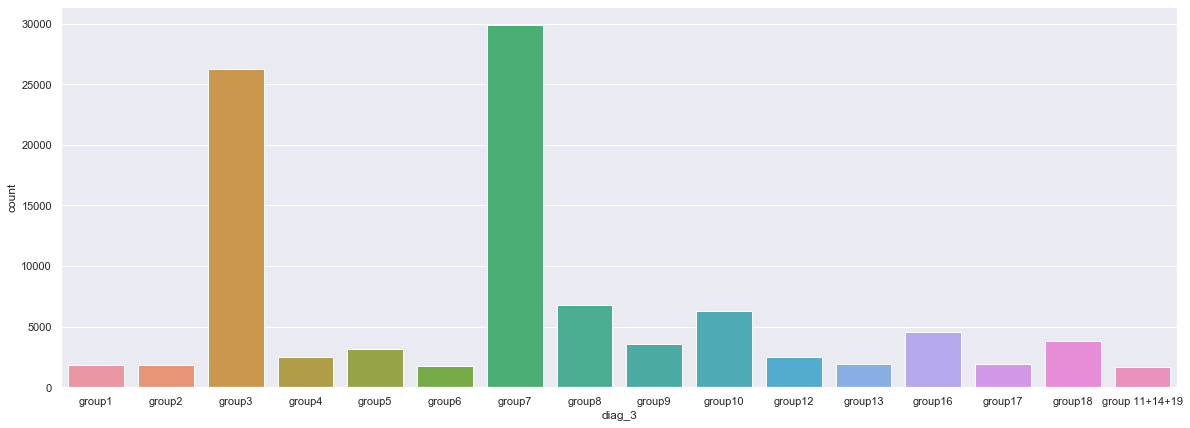

In [35]:
order_list = ['group1','group2','group3','group4','group5','group6','group7','group8','group9','group10',
              'group12','group13','group16','group17','group18','group 11+14+19']
plt.figure(figsize=(20,7))
sns.countplot(data=df_diag,x='diag_3',order=order_list)

In [36]:
# Since we are comparing between Solo insulin and Drug + insulin we will encode the data as such

#Step 1 encode the data. [up,steady,ch = 1 No =0]. To simply things as long the patient in on a drug we will label 1 and vice versa
df_medication = df_diag.copy()


medication_features = df.loc[:,'metformin':'metformin-pioglitazone'].columns

In [37]:
#Step 1 encode the data. [up,steady,ch = 1 No =0]. To simply things as long the patient in on a drug we will label 1 and vice versa
for feature in medication_features:
    df_medication[feature]= np.where(df_medication[feature]=='No',0,1)

In [38]:
# Step 2 for treatment that contains only insulin create new column and name as solo-insulin and other is Drug+insulin

In [39]:
treatment = df_medication.loc[:,'metformin':'metformin-pioglitazone']
treatment.set_index(df_medication.encounter_id, inplace=True)
treatment.sum(axis=1).value_counts()

1    46488
0    23088
2    21591
3     7687
4     1324
5       58
6        5
dtype: int64

In [40]:
ins_treatment = treatment[treatment['insulin'] ==1]
non_ins_treatment = treatment[treatment['insulin'] ==0]

In [41]:
ins =treatment[treatment['insulin'] ==1].sum(axis=1).replace([1,2,3,4,5,6],['Ins','Io','Io','Io','Io','Io'])

In [42]:
non_ins = treatment[treatment['insulin'] == 0].sum(axis=1).replace([0,1,2,3,4,5,6],['NoMed','Other','Other','Other','Other','Other','Other'])

In [43]:
final_treatment = pd.concat([ins,non_ins])

In [44]:
final_treatment = pd.DataFrame({'final_treatment':final_treatment})

In [45]:
final_treatment

,final_treatment
encounter_id,
149190,Ins
500364,Ins
16680,Io
35754,Ins
55842,Io
...,...
443787128,NoMed
443793992,NoMed
443797076,Other


In [46]:
df_medication=df_medication.join(final_treatment,how='inner',on='encounter_id')
df_medication.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,final_treatment
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,group3,group3,group3,9,None,None,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,Ch,Yes,>30,Ins
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,group 11+14+19,group3,group18,6,None,None,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,No,Yes,NO,Other
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,group1,group3,group7,7,None,None,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,Ch,Yes,NO,Ins
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,group2,group2,group3,5,None,None,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,Ch,Yes,NO,Io
5,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,31,6,16,0,0,0,group7,group7,group3,9,None,None,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,No,Yes,>30,Ins


In [47]:
# Drop all the medication columns 
df_medication.loc[:,'metformin':'metformin-pioglitazone'].columns
df_medication.drop(df_medication.loc[:,'metformin':'metformin-pioglitazone'].columns,axis=1,inplace=True)

In [48]:
df_medication

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,final_treatment
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,group3,group3,group3,9,None,None,Ch,Yes,>30,Ins
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,group 11+14+19,group3,group18,6,None,None,No,Yes,NO,Other
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,group1,group3,group7,7,None,None,Ch,Yes,NO,Ins
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,group2,group2,group3,5,None,None,Ch,Yes,NO,Io
5,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,31,6,16,0,0,0,group7,group7,group3,9,None,None,No,Yes,>30,Ins
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),1,3,7,3,51,0,16,0,0,0,group3,group5,group7,9,None,>8,Ch,Yes,>30,Io
101762,443847782,74694222,AfricanAmerican,Female,[80-90),1,4,5,5,33,3,18,0,0,1,group9,group3,group16,9,None,None,No,Yes,NO,Ins
101763,443854148,41088789,Caucasian,Male,[70-80),1,1,7,1,53,0,9,1,0,0,group1,group10,group5,13,None,None,Ch,Yes,NO,Io
101764,443857166,31693671,Caucasian,Female,[80-90),2,3,7,10,45,2,21,0,0,1,group17,group4,group17,9,None,None,Ch,Yes,NO,Io


# Numerical variable pre-proecssing

# Admission type id

In [49]:
df_add_type = df_medication.copy()

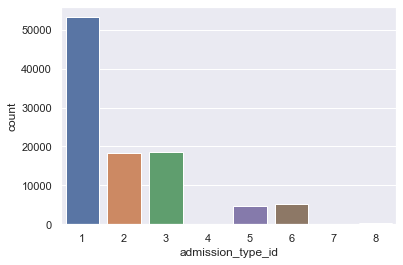

In [50]:
sns.countplot(data = df_add_type,x='admission_type_id')

In [51]:
df_add_type['admission_type_id'].value_counts(1)*100

1    53.102024
3    18.499416
2    18.159236
6     5.186501
5     4.707655
8     0.314243
7     0.020950
4     0.009976
Name: admission_type_id, dtype: float64

In [52]:
df_add_type['admission_type_id'] = df_add_type['admission_type_id'].where(df_add_type['admission_type_id'].isin([1,2,3,5]),6)

In [53]:
df_add_type['admission_type_id'].value_counts(1)*100

1    53.102024
3    18.499416
2    18.159236
6     5.531669
5     4.707655
Name: admission_type_id, dtype: float64

# Discharge Disposition Id & Admission Source Id

In [54]:
df_discharge_add = df_add_type.copy()

In [55]:
num_feature

['encounter_id',
 'patient_nbr',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses']

In [56]:
# We will drop the discharge disposition if and admission source id for now
df_discharge_add.drop(['discharge_disposition_id','admission_source_id'],axis=1,inplace=True)

# Time_in_hospital , Num_medications & Num_lab_procedures

In [57]:
# Create copy of data
df_conti_transform = df_discharge_add.copy()

In [58]:
# Check the change in skewness of the data after a transformation is applied
features_to_transform = ['time_in_hospital','num_medications','num_lab_procedures']

for feature in features_to_transform:
    data = df_conti_transform.copy()
    data['sqrt_{}'.format(feature)] =(data[feature])**(1/2)
    data['log_{}'.format(feature)] =np.log(data[feature])
    print('{} feature has a skewness of {}'.format(feature,data[feature].skew()))
    print('{} feature has a skewness of {}'.format('sqrt_{}'.format(feature),data['sqrt_{}'.format(feature)].skew()))
    print('{} feature has a skewness of {}'.format('log_{}'.format(feature),data['log_{}'.format(feature)].skew()))

time_in_hospital feature has a skewness of 1.1240615325986398
sqrt_time_in_hospital feature has a skewness of 0.4652835715242301
log_time_in_hospital feature has a skewness of -0.21296873331528848
num_medications feature has a skewness of 1.33660633223494
sqrt_num_medications feature has a skewness of 0.36218869435135764
log_num_medications feature has a skewness of -0.7266987916781513
num_lab_procedures feature has a skewness of -0.23754984603849788
sqrt_num_lab_procedures feature has a skewness of -1.1613699668593758
log_num_lab_procedures feature has a skewness of -2.5265145755654745


In [59]:
#Transform the data based on best skewness results and drop the originals

In [60]:
df_conti_transform['log_time_in_hospital'] = np.log(df_conti_transform['time_in_hospital'])
df_conti_transform['sqt_num_medication'] = df_conti_transform['num_medications']**(1/2)

In [61]:
df_conti_transform.drop(['time_in_hospital','num_medications'],axis=1,inplace=True)

In [62]:
df_conti_transform.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,num_lab_procedures,num_procedures,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,final_treatment,log_time_in_hospital,sqt_num_medication
1,149190,55629189,Caucasian,Female,[10-20),1,59,0,0,0,0,group3,group3,group3,9,None,None,Ch,Yes,>30,Ins,1.098612,4.242641
2,64410,86047875,AfricanAmerican,Female,[20-30),1,11,5,2,0,1,group 11+14+19,group3,group18,6,None,None,No,Yes,NO,Other,0.693147,3.605551
3,500364,82442376,Caucasian,Male,[30-40),1,44,1,0,0,0,group1,group3,group7,7,None,None,Ch,Yes,NO,Ins,0.693147,4.000000
4,16680,42519267,Caucasian,Male,[40-50),1,51,0,0,0,0,group2,group2,group3,5,None,None,Ch,Yes,NO,Io,0.000000,2.828427
5,35754,82637451,Caucasian,Male,[50-60),2,31,6,0,0,0,group7,group7,group3,9,None,None,No,Yes,>30,Ins,1.098612,4.000000


In [63]:
num_feature

['encounter_id',
 'patient_nbr',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses']

# Num_procedures,number_outpatient,number_emergency,number_inpatient & number _diagnoses

In [64]:
# Create a copy of the dataset
df_discrete = df_conti_transform.copy()

In [65]:
discrete_feature = ['num_procedures','number_outpatient','number_emergency','number_inpatient','number_diagnoses']

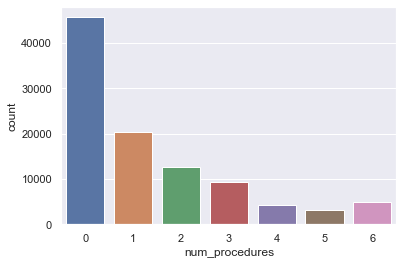

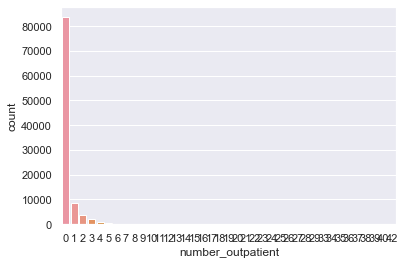

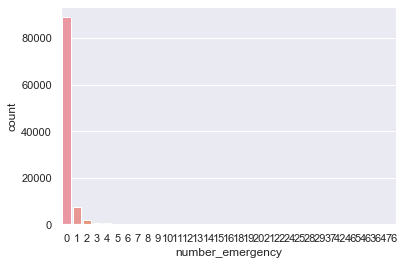

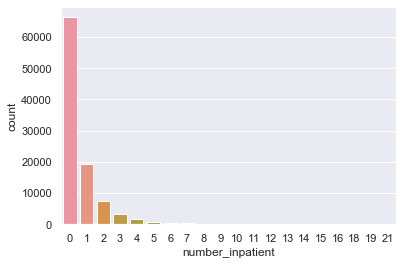

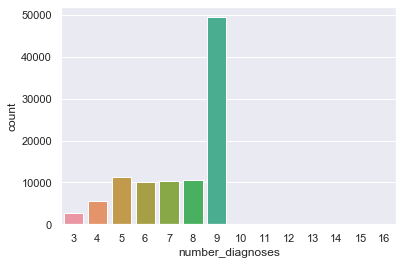

In [66]:
for feature in discrete_feature:
    sns.countplot(data=df_discrete,x=feature)
    plt.xlabel(feature)
    plt.show()

# Number of of procedure feature looks fine.
# Binning will be needed for the rest

In [67]:
# Handling binning for number_outpatient
(df_discrete['number_outpatient'].value_counts(1)*100).in

SyntaxError: invalid syntax (<ipython-input-67-49609543b1ec>, line 2)

In [ ]:
def outpatient_group(x):
    if x >= 4:
        return '>3'
    else:
        return x

In [ ]:
df_discrete['number_outpatient'] = df_discrete['number_outpatient'].apply(outpatient_group)

In [ ]:
order_list = [0,1,2,3,'>3']
sns.countplot(data=df_discrete,x='number_outpatient',order=order_list)

In [ ]:
df_discrete['number_outpatient'].value_counts(1)*100

In [ ]:
# Handling binning for number_emergency
df_discrete['number_emergency'].value_counts(1)*100

In [ ]:
df_discrete['number_emergency'] = df_discrete['number_emergency'].apply(lambda x: '>1' if x >1 else x)

In [ ]:
sns.countplot(data=df_discrete,x='number_emergency')

In [ ]:
# Handling binning for number_inpatient
((df_discrete['number_inpatient'].value_counts(1)*100))

In [ ]:
df_discrete['number_inpatient'] = df_discrete['number_inpatient'].apply(lambda x: '>3' if x >3 else x)

In [ ]:
sns.countplot(data=df_discrete,x='number_inpatient')

In [ ]:
# Handling binning for number_diagnosis
((df_discrete['number_diagnoses'].value_counts(1)*100))

In [ ]:
df_discrete['number_diagnoses'] = df_discrete['number_diagnoses'].apply(lambda x: '>9' if x >9 else x)

In [ ]:
order_list = [3,4,5,6,7,8,9,'>9']
sns.countplot(data=df_discrete,x='number_diagnoses',order=order_list)

In [68]:
# Drop the encounter id and patient number
df_discrete.drop(['encounter_id','patient_nbr'],axis=1,inplace=True)

In [69]:
df_discrete.head()

,race,gender,age,admission_type_id,num_lab_procedures,num_procedures,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,final_treatment,log_time_in_hospital,sqt_num_medication
1,Caucasian,Female,[10-20),1,59,0,0,0,0,group3,group3,group3,9,None,None,Ch,Yes,>30,Ins,1.098612,4.242641
2,AfricanAmerican,Female,[20-30),1,11,5,2,0,1,group 11+14+19,group3,group18,6,None,None,No,Yes,NO,Other,0.693147,3.605551
3,Caucasian,Male,[30-40),1,44,1,0,0,0,group1,group3,group7,7,None,None,Ch,Yes,NO,Ins,0.693147,4.000000
4,Caucasian,Male,[40-50),1,51,0,0,0,0,group2,group2,group3,5,None,None,Ch,Yes,NO,Io,0.000000,2.828427
5,Caucasian,Male,[50-60),2,31,6,0,0,0,group7,group7,group3,9,None,None,No,Yes,>30,Ins,1.098612,4.000000


In [70]:
# Create copy of final cleaned data
df_final = df_discrete.copy()

In [71]:
# Select only cases of succeful treatment
df_final= df_final[df_final['readmitted']=='NO']

In [72]:
df_final['final_treatment'].value_counts()

Ins      15314
NoMed    13683
Other    12562
Io       12259
Name: final_treatment, dtype: int64

In [73]:
# Extract the cases of solo insulin and insulin + drug

df_final= df_final[df_final['final_treatment'].isin(['Ins','Io'])]

In [74]:
df_final['final_treatment'].value_counts()

Ins    15314
Io     12259
Name: final_treatment, dtype: int64

In [106]:
#df_final.to_csv(r'C:\Users\Shangar\Python Studies\Python Projects\Diabetes Readmission\df_final.csv', index = False)

In [42]:
import pandas as pd
df_model = pd.read_csv('df_final.csv')

In [43]:
df_model.head()

,race,gender,age,admission_type_id,num_lab_procedures,num_procedures,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,final_treatment,log_time_in_hospital,sqt_num_medication
0,Caucasian,Male,[30-40),1,44,1,0,0,0,group1,group3,group7,7,None,None,Ch,Yes,NO,Ins,0.693147,4.000000
1,Caucasian,Male,[40-50),1,51,0,0,0,0,group2,group2,group3,5,None,None,Ch,Yes,NO,Io,0.000000,2.828427
2,Caucasian,Male,[60-70),3,70,1,0,0,0,group7,group7,group18,7,None,None,Ch,Yes,NO,Io,1.386294,4.582576
3,Caucasian,Female,[80-90),2,68,2,0,0,0,group7,group7,group1,8,None,None,Ch,Yes,NO,Io,2.564949,5.291503
4,Caucasian,Female,[90-100),3,33,3,0,0,0,group7,group2,group8,8,None,None,Ch,Yes,NO,Io,2.484907,4.242641


In [44]:
from sklearn.preprocessing import OrdinalEncoder

In [45]:
df_model['age'].unique()

array(['[30-40)', '[40-50)', '[60-70)', '[80-90)', '[90-100)', '[70-80)',
       '[50-60)', '[20-30)', '[10-20)', '[0-10)'], dtype=object)

In [46]:
mapper = {'[30-40)':3, '[40-50)':4, '[60-70)':6, '[80-90)':8, '[90-100)':9, '[70-80)':7,
       '[50-60)':5, '[20-30)':2, '[10-20)':1, '[0-10)':0}

In [47]:
df_model['age'] = df_model['age'].replace(mapper)

In [48]:
df_model_encoded = pd.get_dummies(df_model,drop_first=True)

# Train test split

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
df_model_encoded

,age,admission_type_id,num_lab_procedures,num_procedures,number_outpatient,number_emergency,number_inpatient,number_diagnoses,log_time_in_hospital,sqt_num_medication,race_Caucasian,race_Other,gender_Male,diag_1_group1,diag_1_group10,diag_1_group12,diag_1_group13,diag_1_group16,diag_1_group17,diag_1_group18,diag_1_group2,diag_1_group3,diag_1_group4,diag_1_group5,diag_1_group6,diag_1_group7,diag_1_group8,diag_1_group9,diag_2_group1,diag_2_group10,diag_2_group12,diag_2_group13,diag_2_group16,diag_2_group17,diag_2_group18,diag_2_group2,diag_2_group3,diag_2_group4,diag_2_group5,diag_2_group6,diag_2_group7,diag_2_group8,diag_2_group9,diag_3_group1,diag_3_group10,diag_3_group12,diag_3_group13,diag_3_group16,diag_3_group17,diag_3_group18,diag_3_group2,diag_3_group3,diag_3_group4,diag_3_group5,diag_3_group6,diag_3_group7,diag_3_group8,diag_3_group9,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,change_No,final_treatment_Io
0,3,1,44,1,0,0,0,7,0.693147,4.000000,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0
1,4,1,51,0,0,0,0,5,0.000000,2.828427,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1
2,6,3,70,1,0,0,0,7,1.386294,4.582576,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
3,8,2,68,2,0,0,0,8,2.564949,5.291503,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
4,9,3,33,3,0,0,0,8,2.484907,4.242641,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27568,8,1,76,1,0,1,0,9,1.609438,4.690416,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
27569,8,1,1,0,3,0,0,7,0.000000,3.872983,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0
27570,8,1,33,3,0,0,1,9,1.609438,4.242641,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
27571,7,1,53,0,1,0,0,13,0.000000,3.000000,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1


In [99]:
X = df_model_encoded.drop('final_treatment_Io',axis=1)
y = df_model_encoded['final_treatment_Io']

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [93]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scale = pd.DataFrame(scaler.fit_transform(X_train),columns=[X_train.columns])
X_test_scale = pd.DataFrame(scaler.transform(X_test),columns=[X_test.columns])
X_train=X_train_scale
X_test = X_test_scale

In [66]:
#Using logistic regreession 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score,precision_score,recall_score


In [74]:
# Checking perfromance of logistic regression
model_log =LogisticRegression(random_state=0,penalty='l2')
model_log.fit(X_train,y_train)
predictions_log =model_log.predict(X_test)
training_accuracy_log = model_log.score(X_train,y_train)
testing_accuracy_log = accuracy_score(predictions_log,y_test)
print('Training accuracy is {}'.format(training_accuracy_log))
print('Testing accuracy is {}'.format(testing_accuracy_log))
print(classification_report(y_test,predictions_log))
print(confusion_matrix(y_test,predictions_log))


Training accuracy is 0.7774726698098544
Testing accuracy is 0.7751450676982592
              precision    recall  f1-score   support

           0       0.92      0.66      0.77      4628
           1       0.68      0.93      0.78      3644

    accuracy                           0.78      8272
   macro avg       0.80      0.79      0.77      8272
weighted avg       0.81      0.78      0.77      8272

[[3037 1591]
 [ 269 3375]]


C:\Users\Shangar\Anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [73]:
#model_log.score(X_train,y_train)
accuracy_score(y_test,predictions_log)

0.7751450676982592

In [124]:
#Using default random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score,precision_score,recall_score

model_rf =RandomForestClassifier(random_state=0,n_estimators=500,criterion='entropy')
model_rf.fit(X_train,y_train)
predictions_rf = model_rf.predict(X_test)
training_accuracy_rf = model_rf.score(X_train,y_train)
testing_accuracy_rf = accuracy_score(predictions_rf,y_test)
print('Training accuracy is {}'.format(training_accuracy_rf))
print('Testing accuracy is {}'.format(testing_accuracy_rf))
print(classification_report(y_test,predictions_rf))
print(confusion_matrix(y_test,predictions_rf))

Training accuracy is 1.0
Testing accuracy is 0.7734526112185687
              precision    recall  f1-score   support

           0       0.90      0.67      0.77      4628
           1       0.68      0.91      0.78      3644

    accuracy                           0.77      8272
   macro avg       0.79      0.79      0.77      8272
weighted avg       0.81      0.77      0.77      8272

[[3086 1542]
 [ 332 3312]]


In [77]:
# Using default SVM Classfier
from sklearn.svm import SVC
model_svm = SVC()
model_svm.fit(X_train,y_train)
predictions_svm = model_svm.predict(X_test)
training_accuracy_svc = model_svm.score(X_train,y_train)
testing_accuracy_svc = accuracy_score(predictions_svm,y_test)
print('Training accuracy is {}'.format(training_accuracy_svc))
print('Testing accuracy is {}'.format(testing_accuracy_svc))
print(classification_report(y_test,predictions_svm))
print(confusion_matrix(y_test,predictions_svm))

Training accuracy is 0.7844671260556448
Testing accuracy is 0.7671663442940039
              precision    recall  f1-score   support

           0       0.95      0.61      0.75      4628
           1       0.66      0.96      0.78      3644

    accuracy                           0.77      8272
   macro avg       0.81      0.79      0.77      8272
weighted avg       0.82      0.77      0.76      8272

[[2843 1785]
 [ 141 3503]]


In [101]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [102]:
model_ann = Sequential()

model_ann.add(Dense(70,activation='relu'))
model_ann.add(Dropout(0.2))

model_ann.add(Dense(39,activation='relu'))
model_ann.add(Dropout(0.2))

model_ann.add(Dense(1,activation='sigmoid'))

model_ann.compile(loss ='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [103]:
X_train=X_train.values
X_test = X_test.values
y_train = y_train.values
y_test =y_test.values
model_ann.fit(X_train,y_train,epochs=10,batch_size=256,validation_data=(X_test,y_test))

Train on 19301 samples, validate on 8272 samples
Epoch 1/10
19301/19301 [==============================] - 1s 51us/sample - loss: 0.9610 - accuracy: 0.5246 - val_loss: 0.6602 - val_accuracy: 0.6197
Epoch 2/10
19301/19301 [==============================] - 0s 16us/sample - loss: 0.7054 - accuracy: 0.5593 - val_loss: 0.6471 - val_accuracy: 0.6376
Epoch 3/10
19301/19301 [==============================] - 0s 15us/sample - loss: 0.6537 - accuracy: 0.6188 - val_loss: 0.5793 - val_accuracy: 0.7175
Epoch 4/10
19301/19301 [==============================] - 0s 15us/sample - loss: 0.5869 - accuracy: 0.6818 - val_loss: 0.5033 - val_accuracy: 0.7645
Epoch 5/10
19301/19301 [==============================] - 0s 15us/sample - loss: 0.5204 - accuracy: 0.7288 - val_loss: 0.4554 - val_accuracy: 0.7602
Epoch 6/10
19301/19301 [==============================] - 0s 15us/sample - loss: 0.4770 - accuracy: 0.7517 - val_loss: 0.4394 - val_accuracy: 0.7730
Epoch 7/10
19301/19301 [==============================] -

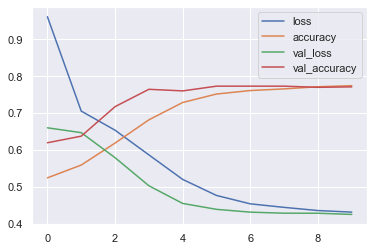

In [104]:
pd.DataFrame(model_ann.history.history).plot()

In [105]:
predictions_ann =model_ann.predict_classes(X_test)
print(confusion_matrix(y_test,predictions_ann))
print(classification_report(y_test,predictions_ann))

[[2907 1721]
 [ 173 3471]]
              precision    recall  f1-score   support

           0       0.94      0.63      0.75      4628
           1       0.67      0.95      0.79      3644

    accuracy                           0.77      8272
   macro avg       0.81      0.79      0.77      8272
weighted avg       0.82      0.77      0.77      8272



In [112]:
training_accuracy_ann =0.7743
esting_accuracy_ann = accuracy_score(y_test,predictions_ann)

# Compare all model training and testing accuracy

In [125]:
model_comp = pd.DataFrame({'Model':['Logistic Regression','Random Forest','SVC','ANN'],'Training Accuracy':[training_accuracy_log,
                                        training_accuracy_rf,training_accuracy_svc,training_accuracy_ann],
                        'Testing accuracy':[testing_accuracy_log,testing_accuracy_rf,testing_accuracy_svc,testing_accuracy_ann]})

In [126]:
model_comp

,Model,Training Accuracy,Testing accuracy
0,Logistic Regression,0.777473,0.775145
1,Random Forest,1.000000,0.773453
2,SVC,0.784467,0.767166
3,ANN,0.774300,0.771035


In [127]:
model_comp.set_index('Model',inplace=True)

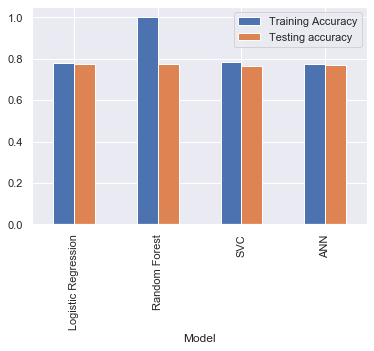

In [128]:
model_comp.plot(kind='bar')